## IMPORT LIBRARIES AND DATASETS

In [215]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
data  = pd.read_csv("breast-cancer-wisconsin.data",header = None)
data.columns = ["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape",
               "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli",
               "Mitoses","Class:"]
data = data.iloc[:,1:]   #IGNORING PATIENT ID

## DATA PREPROCESSING

In [217]:
X = data.iloc[:,:-1]
y = data.iloc[:,[-1]]

In [218]:
# IT WAS DESCRIBED IN THE DATASET DESCRIPTION THAT "?" IS IN PLACE OF MISSING VALUES
X = X.replace({"?":np.nan})

##### WE CAN SEE THERE ARE MISSING VALUES IN BARE NUCLEI

In [219]:
pd.isnull(X).sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
dtype: int64

##### DEALING WITH MISSING VALUES

In [220]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
imputer.fit(X["Bare Nuclei"].values.reshape(-1,1))
X["Bare Nuclei"] = imputer.transform(X["Bare Nuclei"].values.reshape(-1,1))

### FINDING MORE ABOUT THE DATASET VIA VISUALIZATION AND STATS

In [221]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<IPython.core.display.Javascript object>


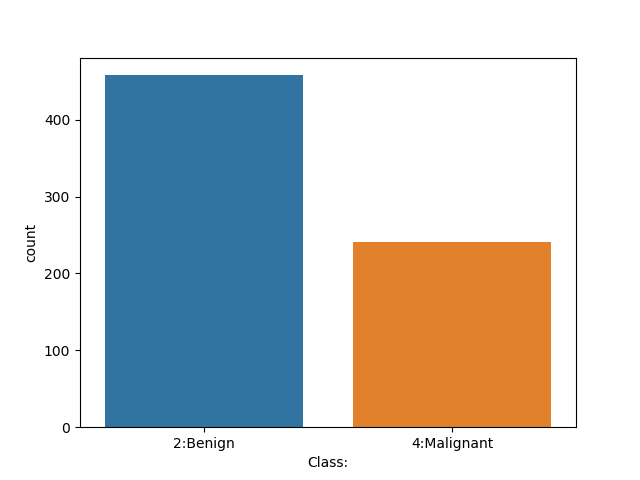

In [222]:
sns.countplot(x = "Class:",data = y)
ax = plt.gca()
ax.set_xticklabels(["2:Benign","4:Malignant"]);

#### FINDING CORRELATION BETWEEN FEATURES

<IPython.core.display.Javascript object>


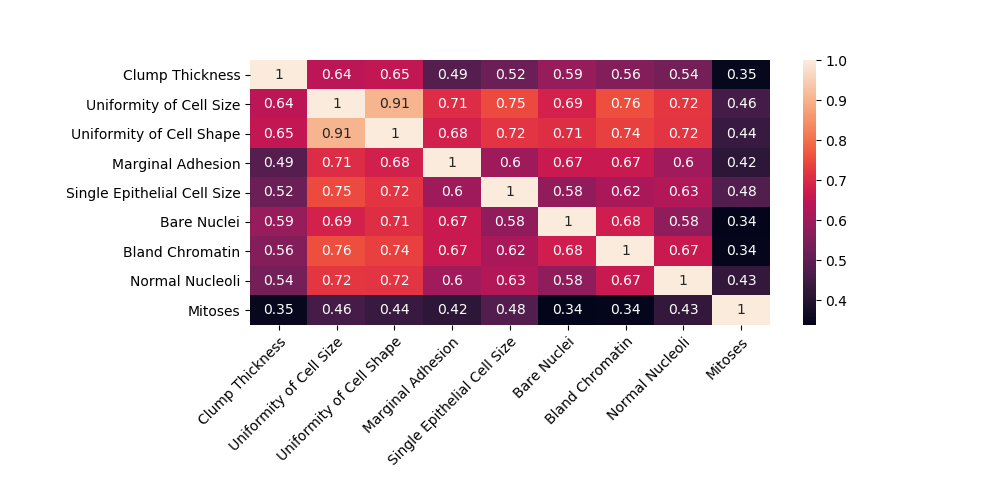

In [223]:
plt.figure(figsize = (10,5))
sns.heatmap(data=X.corr(),annot = True)
plt.subplots_adjust(left = 0.25,bottom = 0.35)
plt.xticks(rotation = 45,rotation_mode = "anchor",ha = "right");

#### Splitting the data

In [224]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### Creating Model

In [225]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### COMPARING RESULTS  (PREDICTION VS REAL)

In [226]:
y_pred = clf.predict(X_test)
np.concatenate((y_pred.reshape(-1,1),y_test.values),1)

array([[2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 2],
       [2, 2],
       [4, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [2, 2],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [4, 4],
       [4, 4],
       [4, 4],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2,

## EVALUATION METRICS

In [227]:
clf.score(X_test,y_test)

0.9428571428571428

#### AS WE PREVIOUSLY SAW FROM THE COUNT PLOT ABOVE THAT THE DATA IS SKEWED / IMBALANCED AND ACCURACY MEASURE  ALONE WOULDN'T BE THE BEST METRIC

<IPython.core.display.Javascript object>


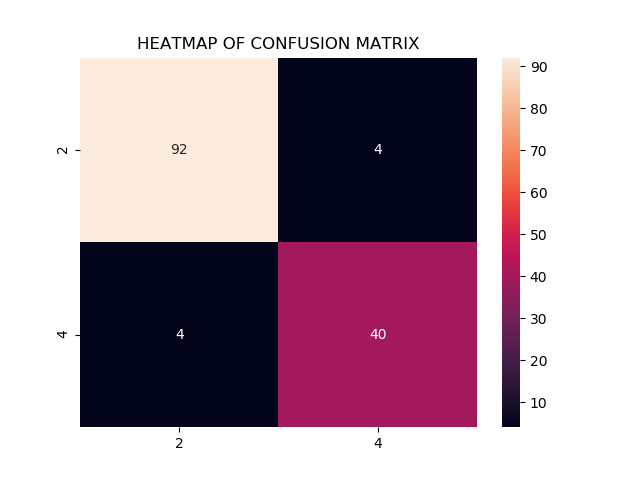

In [228]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
plt.figure()
plt.title("HEATMAP OF CONFUSION MATRIX")
ax = plt.gca()
sns.heatmap(cm,annot = True)
ax.set_xticklabels([2,4])
ax.set_yticklabels([2,4]);

<IPython.core.display.Javascript object>


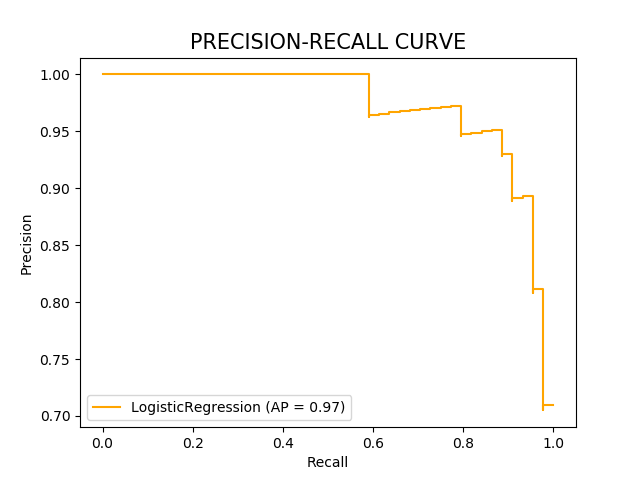

In [229]:
from sklearn.metrics import plot_precision_recall_curve
plot_ = plot_precision_recall_curve(clf,X_test,y_test,c = "orange")
plt.title("PRECISION-RECALL CURVE",fontsize = 15);


#### BY PRECISION-RECALL CURVE (We get high precision and high recall) AND CONFUSION MATRIX,WE OBSERVE THAT OUR MODEL IS PERFORMING REALLY WELL ON UNSEEN VALUES

## CROSS-VALIDATION

In [230]:
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action = "ignore",category = DataConversionWarning)

accuracies = cross_val_score(estimator = clf,X = X_train,y = y_train,cv = 10)
print("THE FINAL MODEL ACCURACY IS",round(accuracies.mean() * 100,2),"%")
print("THE FINAL MODEL ACCURACIES STANDARD DEVIATION IS",round(accuracies.std() * 100,2),"%")

THE FINAL MODEL ACCURACY IS 97.31 %
THE FINAL MODEL ACCURACIES STANDARD DEVIATION IS 2.01 %
